## Imports

In [9]:
# Biology
import scanpy as sc
import anndata as ad
import muon as mu

In [10]:
# Maths
import pandas as pd
import numpy as np
import torch
from torch import optim
from umap import UMAP

In [11]:
# Our packages
import sys
sys.path.append('../')

import models
import pl

In [12]:
# Plotting
import matplotlib.pyplot as plt

## Load data

In [48]:
mdata = mu.read_h5mu('../datasets/Liu/preprocessed/liu.h5mu.gz')
rna = mdata.mod['rna']
atac = mdata.mod['atac']

## Varying genes

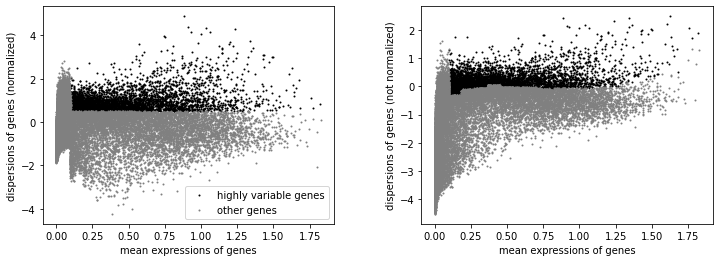

3861

In [49]:
# Highly variable genes
sc.pp.highly_variable_genes(rna, min_mean=0.1, max_mean=4, min_disp=0.5)
sc.pl.highly_variable_genes(rna)
np.sum(rna.var.highly_variable)

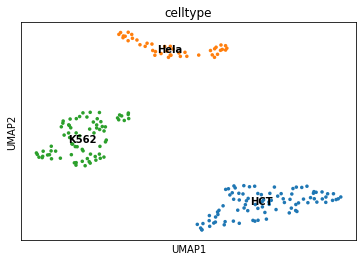

In [50]:
# Umap
sc.pp.scale(rna, zero_center=False)
sc.tl.pca(rna, svd_solver='arpack')
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=10)
sc.tl.umap(rna, spread=1.5, min_dist=.5)
sc.pl.umap(rna, color="celltype", legend_loc="on data", size=50)

## Preprocess ATAC

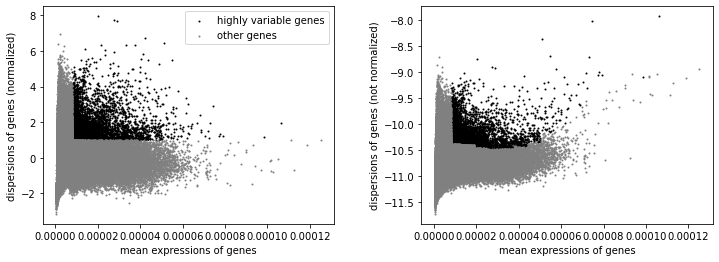

4168

In [51]:
sc.pp.highly_variable_genes(atac, min_mean=8e-6, max_mean=4, min_disp=1)
sc.pl.highly_variable_genes(atac)
np.sum(atac.var.highly_variable)

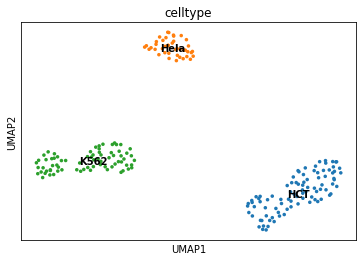

In [52]:
# Umap
sc.pp.scale(atac, zero_center=False)
sc.tl.pca(atac, svd_solver='arpack')
sc.pp.neighbors(atac, n_neighbors=10, n_pcs=10)
sc.tl.umap(atac, spread=1.5, min_dist=.5)
sc.pl.umap(atac, color="celltype", legend_loc="on data", size=50)

## OT NMF

In [149]:
from importlib import reload

In [150]:
reload(models)

<module 'models' from '../models.py'>

In [151]:
eps = .05
latent_dim = 5

In [152]:
nmf = models.OTintNMF(latent_dim=latent_dim, rho_h=.08, rho_w=.08, lr=1e-2, eps=eps, decay_rate=1)

In [157]:
nmf.fit_transform(mdata, cost='cosine', n_iter_inner=20, n_iter=10, device='cpu')

100%|██████████| 800/800 [08:22<00:00,  2.42s/it]

## Convergence plots

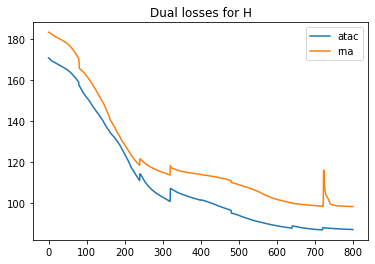

100%|██████████| 800/800 [08:23<00:00,  1.59it/s]


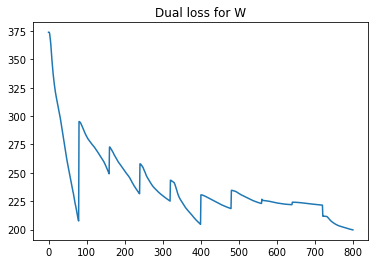

In [158]:
plt.title('Dual losses for H')
for mod in mdata.mod:
    plt.plot(nmf.losses_h[mod])
plt.legend(mdata.mod.keys())
plt.show()

plt.title('Dual loss for W')
plt.plot(nmf.losses_w)
plt.show()

## Viz

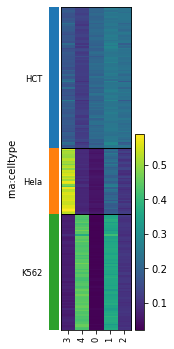

In [159]:
pl.heatmap(mdata, 'W_OT', 'rna:celltype')

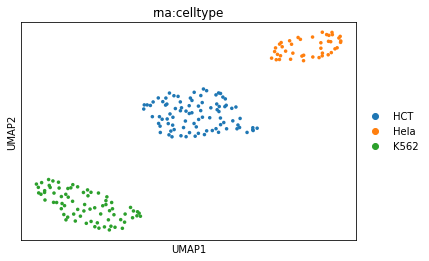

In [160]:
pl.umap(mdata, 'W_OT', 'rna:celltype')